In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data

In [2]:
data = pd.read_csv('creditcard_2023.csv')

In [3]:
data.sample(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
87724,87724,1.069120,-0.469427,0.085505,-0.908258,1.287329,2.118994,0.270908,0.037821,0.462539,...,-0.228035,-0.969504,0.071121,2.203072,0.520919,0.259646,-0.272496,-0.066409,19907.39,0
149162,149162,-0.188436,-0.013017,2.492106,0.323891,0.598046,1.027180,0.629968,-0.170103,0.797397,...,-0.101646,0.209021,-0.568784,-1.354584,0.928786,0.358395,-0.813292,-0.492960,20867.57,0
368053,368053,0.206765,0.705827,-0.795683,1.323426,0.953976,-0.691241,0.121429,0.007781,-1.103816,...,0.006595,-0.345971,-0.189980,-1.549576,-0.494013,1.127556,0.330361,0.393455,1797.52,1
556388,556388,-1.052838,0.833461,-1.106705,1.665374,-1.225831,-1.414880,-1.498411,0.852306,-1.943745,...,0.764877,0.752863,-0.475137,1.103915,-0.753763,0.795885,2.766495,0.920994,8595.67,1
153440,153440,-0.373244,-0.014634,0.202298,-0.792234,0.310015,-0.236291,0.497966,-0.046788,1.479250,...,-0.302027,-0.654639,0.567976,-0.359852,-0.461617,0.307685,-0.114478,-0.154305,22412.45,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
data['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [9]:
X = data.drop('Class', axis=1)
y = data['Class']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled.shape

(398041, 30)

In [16]:
X_test_scaled.shape

(170589, 30)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(30,), name='L1'),
    Dropout(0.2, name='D1'),
    Dense(32, activation='relu', name='L2'),
    Dropout(0.3, name='D2'),
    Dense(1, activation='sigmoid', name='L3')
])

In [19]:
model.compile(optimizer=Adam(0.01), loss=BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 64)                1984      
                                                                 
 D1 (Dropout)                (None, 64)                0         
                                                                 
 L2 (Dense)                  (None, 32)                2080      
                                                                 
 D2 (Dropout)                (None, 32)                0         
                                                                 
 L3 (Dense)                  (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
11195/11195 [==============================] - 14s 1ms/step - loss: 0.0219 - accuracy: 0.9931 - val_loss: 0.0093 - val_accuracy: 0.9981
Epoch 2/10
11195/11195 [==============================] - 13s 1ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.0082 - val_accuracy: 0.9979
Epoch 3/10
11195/11195 [==============================] - 13s 1ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.0072 - val_accuracy: 0.9983
Epoch 4/10
11195/11195 [==============================] - 13s 1ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0104 - val_accuracy: 0.9968
Epoch 5/10
11195/11195 [==============================] - 13s 1ms/step - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.0061 - val_accuracy: 0.9984
Epoch 6/10
11195/11195 [==============================] - 13s 1ms/step - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.0053 - val_accuracy: 0.9987
Epoch 7/10
11195/11195 [==============================] - 12s 1ms/step - loss: 0.0110 - accuracy: 0.9970 - val_loss: 0

In [22]:
y_pred = model.predict(X_test_scaled)

5331/5331 [==============================] - 4s 663us/step


In [23]:
y_pred = (y_pred>=0.5)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
print(confusion_matrix(y_pred=y_pred, y_true=y_test))

[[85344    84]
 [  166 84995]]


In [26]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85428
           1       1.00      1.00      1.00     85161

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [36]:
print(f"Accuracy: {accuracy_score(y_pred=y_pred, y_true=y_test) * 100:.2f}%")

Accuracy: 99.85%


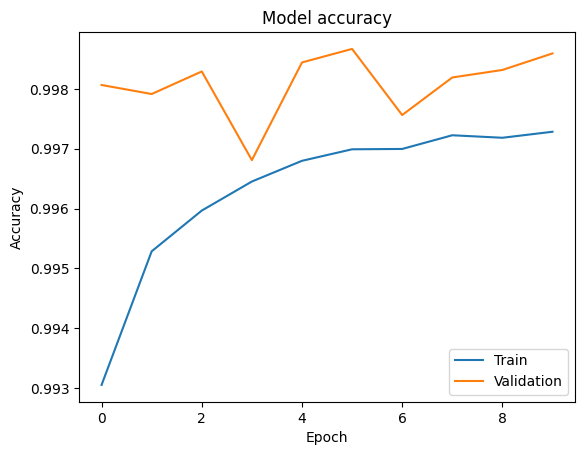

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

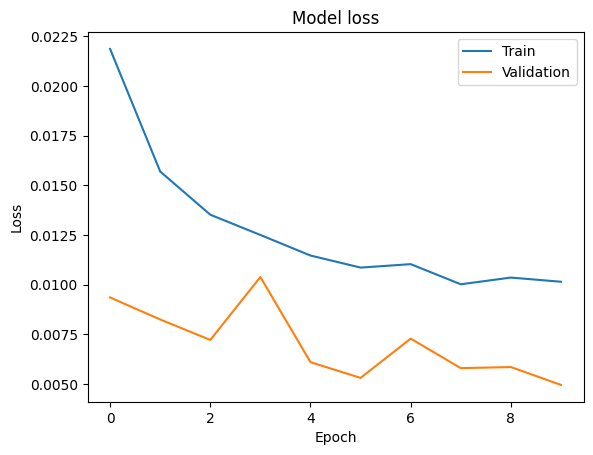

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()